In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab3_Files/'
filename_ex1 = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab3_Files/ex1.jpg'
filename_ex2 = '/content/gdrive/My Drive/CMPUT 206 Wi19/Lab3_Files/ex2.jpg'

 ex1.jpg		   lab3_part3.ipynb	     Part3_Template.ipynb
 ex2.jpg		  'Localized Blurring.pdf'
'Lab3_part1&part2.ipynb'   part3.ipynb


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


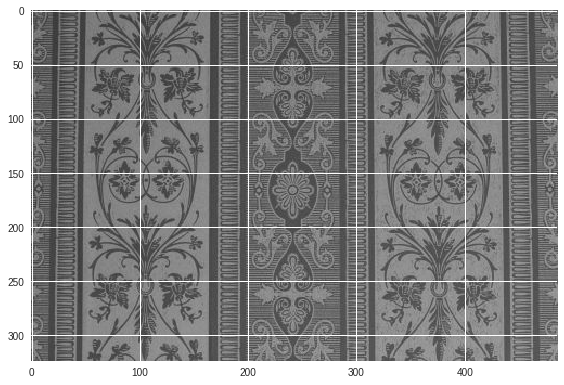

In [0]:
#Your Code Here
import skimage
from skimage import io,img_as_ubyte
import numpy as np
import math
import matplotlib.pyplot as plt  
import cv2

img = io.imread('/content/gdrive/My Drive/CMPUT 206 Wi19/Lab3_Files/ex1.jpg',as_grey=True)
io.imshow(img)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


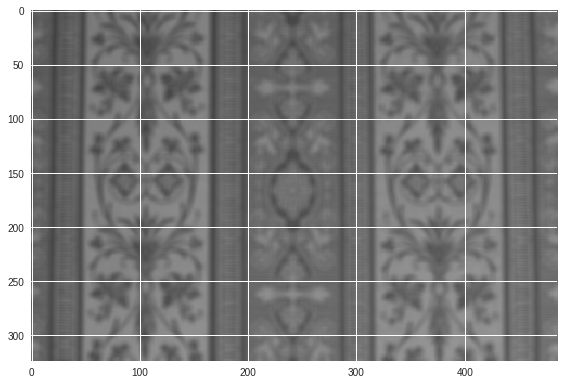

In [0]:
#Use cv2.GaussianBlur because the kernel of skimage.filters.Gaussian is too small, the blurring effect of cv2.GaussianBlur is much better
blurred_img = cv2.GaussianBlur(img, (7, 7), 3)
io.imshow(blurred_img)

In [0]:
x = int(input("Enter your x coordinate: "))
y = int(input("Enter your y coordinate: "))
sigma = float(input("Enter your sigma coordinate: "))

In [0]:
#your code here
import cv2
import numpy as np
import math
import skimage
from skimage import io,img_as_ubyte
import numpy as np



#init the img 
img = cv2.imread(filename_ex1, 0).astype(np.uint8)
current_img = np.copy(img)

#def initGaussianKernel(x,y,sigma):
    #print( 'Initializing Gaussian Mask...') 
    #for x in range(kernel_width):
        #for y in range(kernel_height):
            #diff_x = float(img_width - x)
            #diff_y = float(img_height - y)
            #exp_factor = (np.power(diff_x,2) + np.power(diff_y,2)) / (np.power(sigma,2))
            #gaussian_kernel[y, x] = math.exp(-exp_factor)
    


#def initCauchyKernel(x,y,sigma):
    #print('Initializing Cauchy Mask...')
    #for x in range(kernel_width):
        #for y in range(kernel_height):
            #diff_x = float(img_width - x)
            #diff_y = float(img_height - y)
            #factor = (np.power(diff_x,2) + np.power(diff_y,2)) / (np.power(sigma,2))
            #cauchy_kernel[y, x] = 1 / (1 + factor)
 
  
def main():
  #user input
  x = int(input("Enter your x coordinate: "))
  y = int(input("Enter your y coordinate: "))
  sigma = float(input("Enter your sigma coordinate: "))
  
  img_height = img.shape[0]
  img_width = img.shape[1]
  print(img_height)
  print(img_width)
  kernel_width = (2*img_width)+1
  kernel_height = (2*img_height)+1

  gaussian_kernel = np.zeros((kernel_height, kernel_width))
  cauchy_kernel = np.zeros((kernel_height, kernel_width))
  
  #must define global, otherwise raise a local variable problem
  global current_img
  blurred_img = cv2.GaussianBlur(current_img, (7, 7), 3).astype(np.float32)

  #init  gaussian_kernel
  print( 'Initializing Gaussian Mask...') 
  for x in range(kernel_width):
    for y in range(kernel_height):
      diff_x = float(img_width - x)
      diff_y = float(img_height - y)
      exp_factor = (np.power(diff_x,2) + np.power(diff_y,2)) / (np.power(sigma,2))
      gaussian_kernel[y, x] = math.exp(-exp_factor)
  #init CauchyKernel
  print('Initializing Cauchy Mask...')
  for x in range(kernel_width):
    for y in range(kernel_height):
      diff_x = float(img_width - x)
      diff_y = float(img_height - y)
      factor = (np.power(diff_x,2) + np.power(diff_y,2)) / (np.power(sigma,2))
      cauchy_kernel[y, x] = 1 / (1 + factor)
  
  
  # compute the x and y extents of the mask to extract
  x1 = img_width - x
  y1 = img_height - y
  x2 = x1 + img_width
  y2 = y1 + img_height

  
  # extract the translated mask from the filter
  mask1 = gaussian_kernel[y1:y2, x1:x2]
  mask2 = cauchy_kernel[y1:y2, x1:x2]
  
  # the final result of gaussian
  img1 = np.multiply(blurred_img, mask1)
  img2 = np.multiply(1-mask1,current_img)
  gas_img = cv2.add(img1, img2)
  
  #the final result of cauchy
  img3 = np.multiply(blurred_img, mask2)
  img4 = np.multiply(1-mask2, current_img)
  cau_img = cv2.add(img3, img4)

  # plot the result
  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14, 6))
  ax1.set_title('Gaussian')
  ax1.imshow(gas_img,cmap=plt.cm.gray)
  ax2.set_title('Cauchy')
  ax2.imshow(cau_img,cmap=plt.cm.gray)
  #plt.imshow(gas_img,'gray'), plt.title('Gaussian')  
  #plt.imshow(cau_img,'gray'), plt.title('Cauchy')
  plt.show()

if __name__ =="__main__":
  main()






Enter your x coordinate: 100
Enter your y coordinate: 100
Enter your sigma coordinate: 50
324
486
Initializing Gaussian Mask...
Initializing Cauchy Mask...


ValueError: ignored

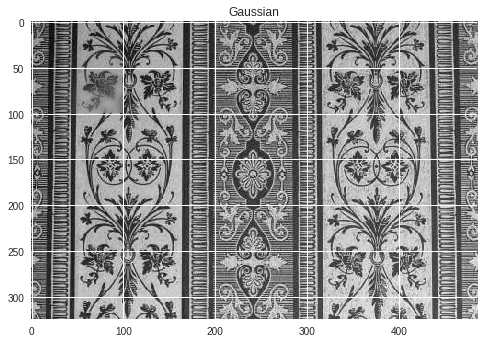

In [0]:
import cv2, math
import numpy as np
import math
import skimage
from skimage import io,img_as_ubyte
import numpy as np
from matplotlib import pyplot as plt

x= 100
y= 100
s=50
image = cv2.imread(filename_ex1, 0)
filtered = cv2.GaussianBlur(image, (25, 25), 0)

# Get image dimension (Height and Width)
dimension = image.shape
height = dimension[0]
width = dimension[1]
   



ken_height = (height * 2)+1
ken_width = (width * 2)+1
diffX = height - y
diffY = width - x
weight = [[0 for x in range(ken_width)]for y in range(ken_height)]


x0 = height
y0 = width
for x in range(height):
  for y in range(width):
    weight[x][y] = math.exp(-((x-x0)**2+(y-y0)**2)/(s*s))


for a in range(height):
  for b in range(width):
    image[a][b] = weight[a + diffX][b + diffY]*filtered[a][b]+(1-weight[a + diffX][b + diffY])*image[a][b]

    
    
    
    
plt.imshow(image,'gray'), plt.title('Gaussian')
plt.show()
